In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('../results-ads.csv')
print(df.shape)
df.head()

(100000000, 6)


,step,reward,is_optimal,epsilon,action,run
0,0,0,False,0.01,3,0
1,1,0,False,0.01,1,0
2,2,0,False,0.01,3,0
3,3,1,False,0.01,7,0
4,4,0,False,0.01,7,0


In [5]:
agg = df.groupby(['epsilon', 'run']).agg({'reward': np.sum})
agg = agg.reset_index()
agg = agg.groupby('epsilon').agg({'reward': np.mean}).sort_values('reward', ascending=False)
agg

,reward
epsilon,
0.077,2456.551
0.046,2449.470
0.129,2426.228
0.028,2409.951
0.017,2343.874
0.215,2333.230
0.010,2274.672
0.359,2144.526
0.599,1810.374


<AxesSubplot:title={'center':'Effect of epsilon on average reward'}, xlabel='Epsilon', ylabel='Average Reward'>

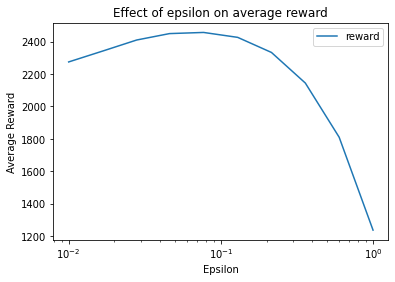

In [7]:
agg.sort_values('epsilon', ascending=True).plot(logx=True, ylabel='Average Reward', xlabel='Epsilon', title='Effect of epsilon on average reward')

In [8]:
best = df.groupby(['epsilon', 'run']).agg({'reward': np.sum})
best = best.reset_index().sort_values('reward', ascending=False)
best.head(20)

,epsilon,run,reward
434,0.010,434,2693
651,0.010,651,2692
779,0.010,779,2689
58,0.010,58,2688
299,0.010,299,2688
486,0.010,486,2688
850,0.010,850,2687
354,0.010,354,2687
602,0.010,602,2687
151,0.010,151,2687


In [9]:
best_run = df[(df['epsilon'] == 0.01) & (df['run'] == 434)]
best_run['action'].value_counts()

4    9899
5      15
6      13
2      12
3      12
1      10
0      10
8      10
7      10
9       9
Name: action, dtype: int64

# Index 4 is Ad 5

In [10]:
agg = df.groupby(["epsilon", "step"]).agg({"reward": np.mean, "is_optimal": [np.sum, len]})
agg['optimal %'] = agg['is_optimal']['sum'] / agg['is_optimal']['len']
agg['avg_reward'] = agg['reward']['mean']
agg = agg[['avg_reward', 'optimal %']]
agg = agg.reset_index()
agg.head(5)

,epsilon,step,avg_reward,optimal %
,,,,
0,0.01,0,0.316,0.091
1,0.01,1,0.158,0.158
2,0.01,2,0.000,0.145
3,0.01,3,0.123,0.063
4,0.01,4,0.000,0.144


epsilon
0.010    AxesSubplot(0.125,0.125;0.775x0.755)
0.017    AxesSubplot(0.125,0.125;0.775x0.755)
0.028    AxesSubplot(0.125,0.125;0.775x0.755)
0.046    AxesSubplot(0.125,0.125;0.775x0.755)
0.077    AxesSubplot(0.125,0.125;0.775x0.755)
0.129    AxesSubplot(0.125,0.125;0.775x0.755)
0.215    AxesSubplot(0.125,0.125;0.775x0.755)
0.359    AxesSubplot(0.125,0.125;0.775x0.755)
0.599    AxesSubplot(0.125,0.125;0.775x0.755)
1.000    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avg_reward, dtype: object

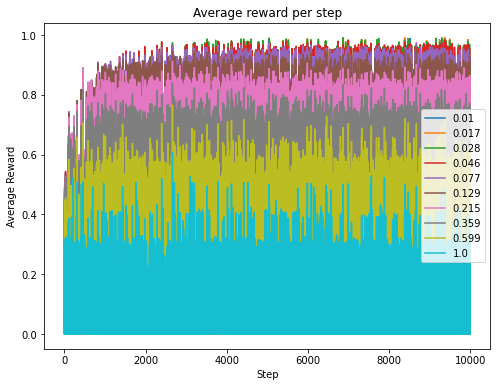

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
agg.set_index('step').groupby('epsilon')['avg_reward'].plot(ax=ax, legend=True, xlabel='Step', ylabel='Average Reward', title='Average reward per step')

epsilon
0.010    AxesSubplot(0.125,0.125;0.775x0.755)
0.017    AxesSubplot(0.125,0.125;0.775x0.755)
0.028    AxesSubplot(0.125,0.125;0.775x0.755)
0.046    AxesSubplot(0.125,0.125;0.775x0.755)
0.077    AxesSubplot(0.125,0.125;0.775x0.755)
0.129    AxesSubplot(0.125,0.125;0.775x0.755)
0.215    AxesSubplot(0.125,0.125;0.775x0.755)
0.359    AxesSubplot(0.125,0.125;0.775x0.755)
0.599    AxesSubplot(0.125,0.125;0.775x0.755)
1.000    AxesSubplot(0.125,0.125;0.775x0.755)
Name: optimal %, dtype: object

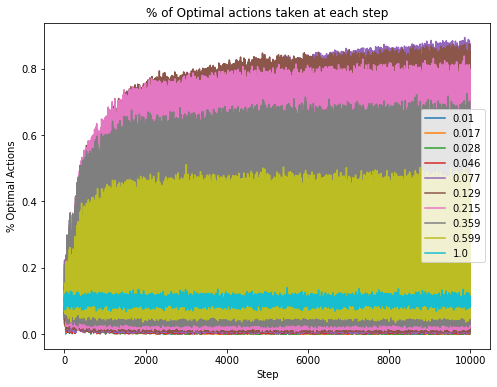

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
agg.set_index('step').groupby('epsilon')['optimal %'].plot(ax=ax, legend=True, ylabel='% Optimal Actions', xlabel='Step', title='% of Optimal actions taken at each step')

In [4]:
ads = pd.read_csv('../Ads_Optimisation.csv')
ads.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [5]:
ads['sum'] = ads.sum(axis=1)
ads.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10,sum
0,1,0,0,0,1,0,0,0,1,0,3
1,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0


In [7]:
ads['sum'].value_counts()

1    3822
0    2576
2    2505
3     876
4     179
5      41
6       1
Name: sum, dtype: int64

In [8]:
ads = ads[ads['sum'] != 0]
ads.head(

)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10,sum
0,1,0,0,0,1,0,0,0,1,0,3
1,0,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,0,1,0,0,2
5,1,1,0,0,0,0,0,0,0,0,2
6,0,0,0,1,0,0,0,0,0,0,1
